In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
from sklearn.model_selection import TimeSeriesSplit
import holidays
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from statsmodels.tools.eval_measures import rmse
from prophet.plot import add_changepoints_to_plot
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [4]:
df = pd.read_csv('/content/drive/Othercomputers/My Mac/Final Project/Time-Series-Forecasting/data/cleaned_03.csv')

In [5]:
df1=df.round(2)
columns_to_round = ['gross_revenue','profit']
df1 = df.copy()
for col in columns_to_round:
    df1[col] = df[col].round(2)
df1.head()

,order_id,date,payment,item_code,quantity,gift_quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,CreatedAt,...,year,week_of_year,price_difference,morning,afternoon,evening,total_sales_country_product,avg_sales_country_product,total_sales_country_product_month,avg_sales_country_product_day
0,2000093387,2020-04-24,GOPAY_CARD,S101,1,0.0,3.51,0.00,3.50,2020-04-24 21:50:00,...,2020,17,0.01,0,0,1,215037.02,1.61,14268.25,1.56
1,2000093387,2020-04-24,GOPAY_CARD,S113,1,0.0,-0.71,0.00,-0.72,2020-04-24 21:50:00,...,2020,17,0.01,0,0,1,215037.02,1.61,14268.25,1.56
2,2000093388,2020-04-24,COD,ZB00089178,1,0.0,5.83,2.21,6.47,2020-04-24 21:45:00,...,2020,17,-0.64,0,0,1,9275270.79,38.07,526599.68,38.15
3,2000093388,2020-04-24,COD,ZB00138060,1,0.0,5.83,2.21,6.47,2020-04-24 21:45:00,...,2020,17,-0.64,0,0,1,9275270.79,38.07,526599.68,38.15
4,2000093388,2020-04-24,COD,ZB00015664,1,0.0,19.38,18.73,32.02,2020-04-24 21:45:00,...,2020,17,-12.64,0,0,1,1749344.59,25.37,118211.77,25.31


In [6]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Calculate the sum of sales for each date and category
df_sales_by_category = df.groupby(['date', 'category'])['gross_revenue'].sum().reset_index()


In [7]:
# Pivot the dataframe to have categories as columns and date as index
df_categories_sales = df_sales_by_category.pivot_table(index='date', columns='category', values='gross_revenue', fill_value=0)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw4i29t6g/slvh_dep.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw4i29t6g/qfmkiv1d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26655', 'data', 'file=/tmp/tmpw4i29t6g/slvh_dep.json', 'init=/tmp/tmpw4i29t6g/qfmkiv1d.json', 'output', 'file=/tmp/tmpw4i29t6g/prophet_modelalyqcm9b/prophet_model-20230422204447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:44:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:44:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


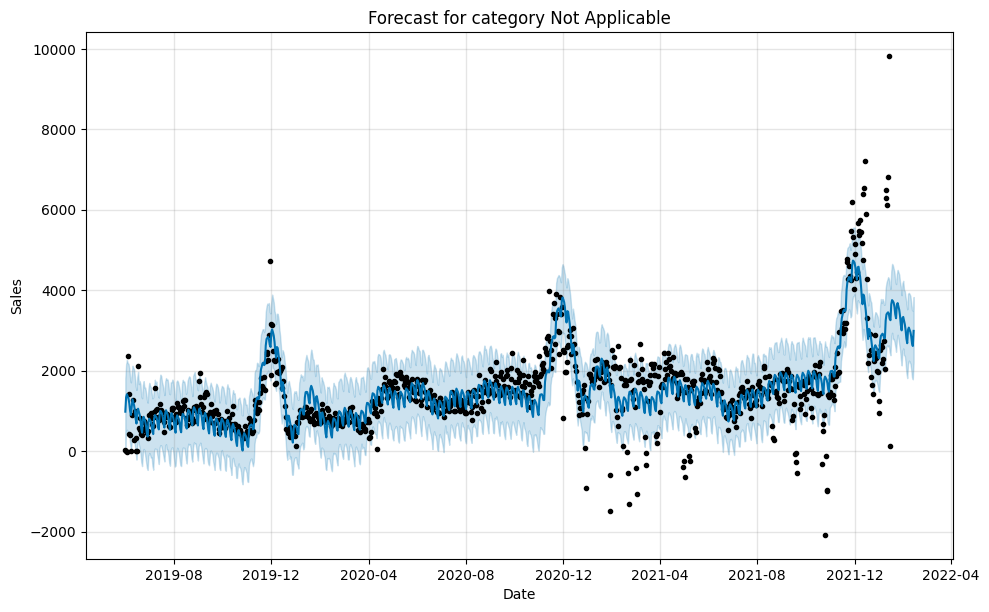

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw4i29t6g/6rbobbkd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw4i29t6g/f02rq4lh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46783', 'data', 'file=/tmp/tmpw4i29t6g/6rbobbkd.json', 'init=/tmp/tmpw4i29t6g/f02rq4lh.json', 'output', 'file=/tmp/tmpw4i29t6g/prophet_model7i212kse/prophet_model-20230422204448.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:44:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:44:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


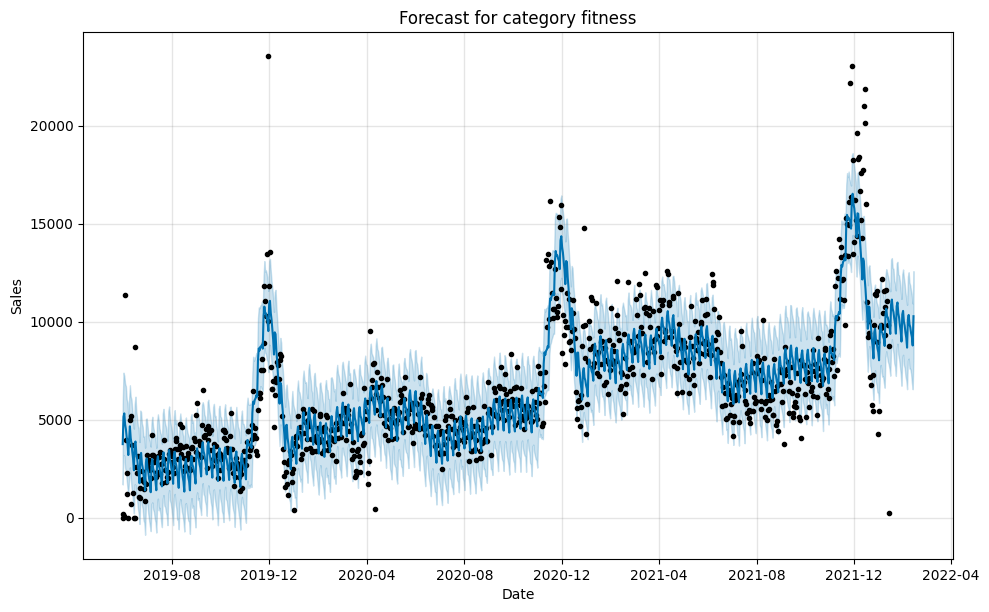

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw4i29t6g/abujjri2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw4i29t6g/jjoqmi1b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90004', 'data', 'file=/tmp/tmpw4i29t6g/abujjri2.json', 'init=/tmp/tmpw4i29t6g/jjoqmi1b.json', 'output', 'file=/tmp/tmpw4i29t6g/prophet_modelzabzdsso/prophet_model-20230422204449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:44:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:44:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


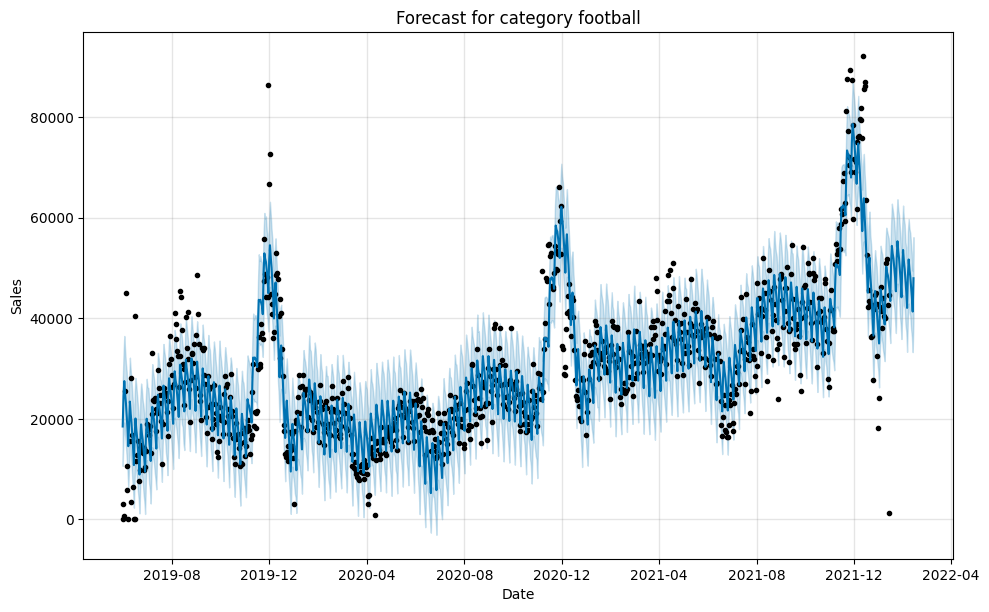

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw4i29t6g/g02mcwac.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw4i29t6g/c20p1dif.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22108', 'data', 'file=/tmp/tmpw4i29t6g/g02mcwac.json', 'init=/tmp/tmpw4i29t6g/c20p1dif.json', 'output', 'file=/tmp/tmpw4i29t6g/prophet_model5xqsu5ye/prophet_model-20230422204450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:44:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:44:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


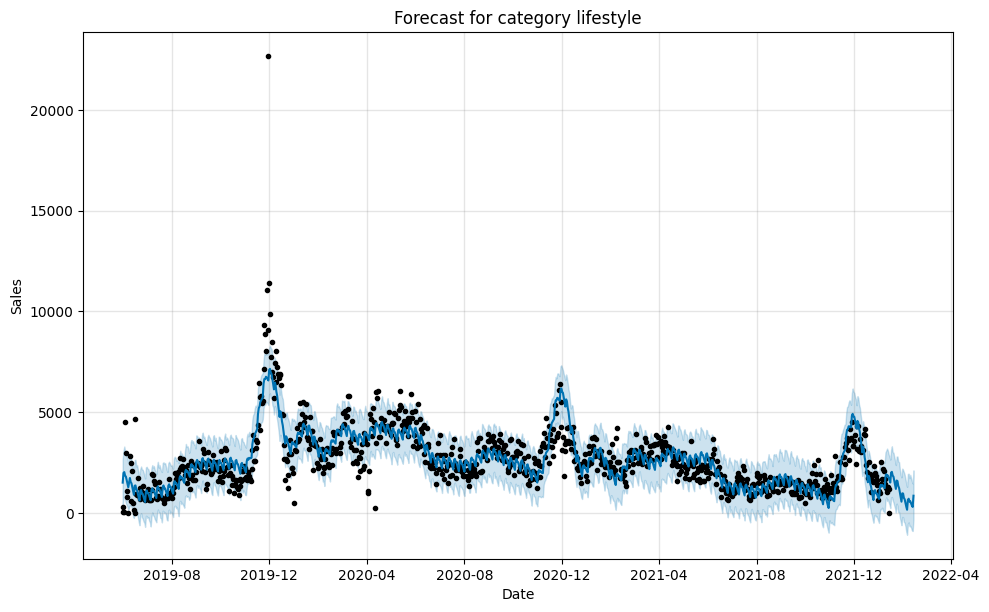

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw4i29t6g/540yro7q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw4i29t6g/isffeh_v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85437', 'data', 'file=/tmp/tmpw4i29t6g/540yro7q.json', 'init=/tmp/tmpw4i29t6g/isffeh_v.json', 'output', 'file=/tmp/tmpw4i29t6g/prophet_modelx9vi02e4/prophet_model-20230422204451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:44:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:44:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


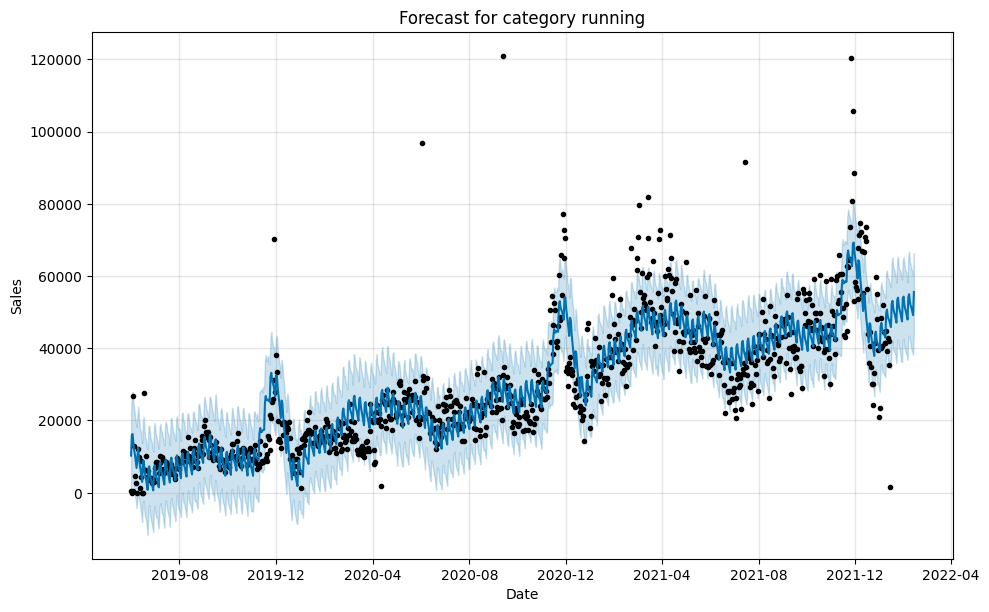

In [ ]:
for category in df_categories_sales.columns:
    # Prepare the dataset for Prophet
    category_df = df_categories_sales[[category]].reset_index()
    category_df.columns = ['ds', 'y']

    # Fit the Prophet model and make a forecast
    model = Prophet()
    model.fit(category_df)
    future = model.make_future_dataframe(periods=30, freq='D')
    category_forecast = model.predict(future)

    # Plot the forecast
    fig = model.plot(category_forecast)
    plt.title(f"Forecast for category {category}")
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()


### Try to split dataset into training and testing to see the result accuracy


In [8]:
# Split the data into training and testing sets
train = df_categories_sales.loc['2019-06-01':'2021-10-31']
test = df_categories_sales.loc['2021-11-01':'2022-01-14']

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6wqmfrez/qwhfz9wp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6wqmfrez/4vj1tujl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79869', 'data', 'file=/tmp/tmp6wqmfrez/qwhfz9wp.json', 'init=/tmp/tmp6wqmfrez/4vj1tujl.json', 'output', 'file=/tmp/tmp6wqmfrez/prophet_model_qo17kif/prophet_model-20230422212808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:28:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:28:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Category: Not Applicable
MAE: 670.61
MSE: 695148.23
RMSE: 833.76


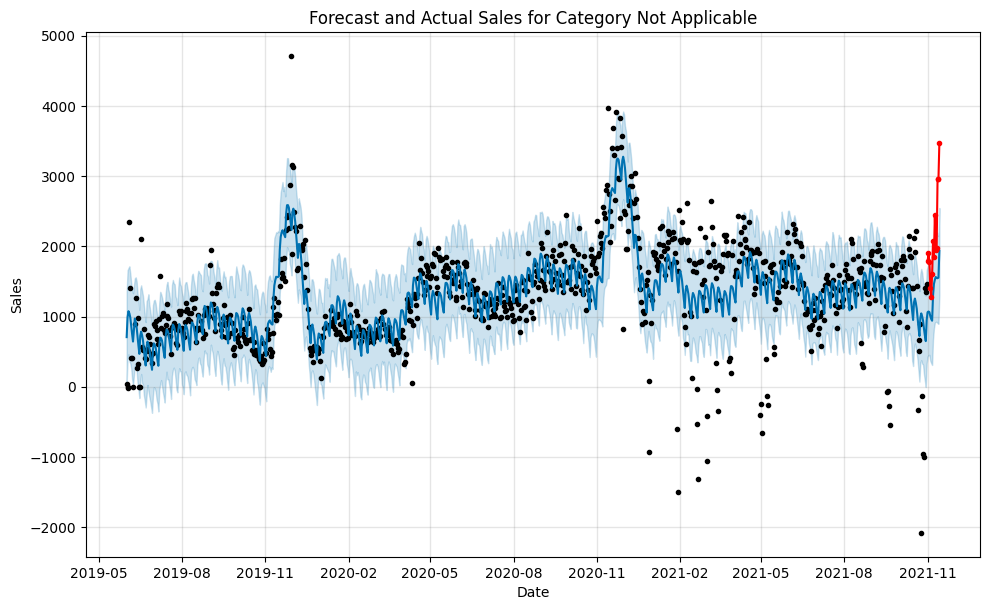

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6wqmfrez/25tkat6c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6wqmfrez/38vbret0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57274', 'data', 'file=/tmp/tmp6wqmfrez/25tkat6c.json', 'init=/tmp/tmp6wqmfrez/38vbret0.json', 'output', 'file=/tmp/tmp6wqmfrez/prophet_model2dc1asig/prophet_model-20230422212810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:28:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:28:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Category: fitness
MAE: 2365.20
MSE: 9085504.13
RMSE: 3014.22


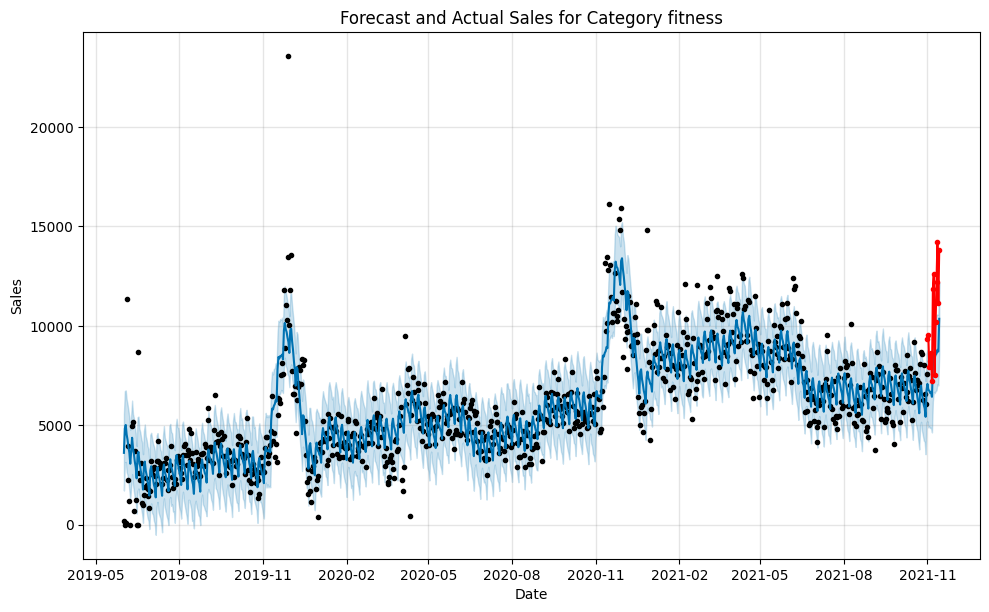

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6wqmfrez/kcralkdr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6wqmfrez/xsm63_2q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98576', 'data', 'file=/tmp/tmp6wqmfrez/kcralkdr.json', 'init=/tmp/tmp6wqmfrez/xsm63_2q.json', 'output', 'file=/tmp/tmp6wqmfrez/prophet_modelu14g_pxb/prophet_model-20230422212811.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:28:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:28:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Category: football
MAE: 17826.15
MSE: 373633844.75
RMSE: 19329.61


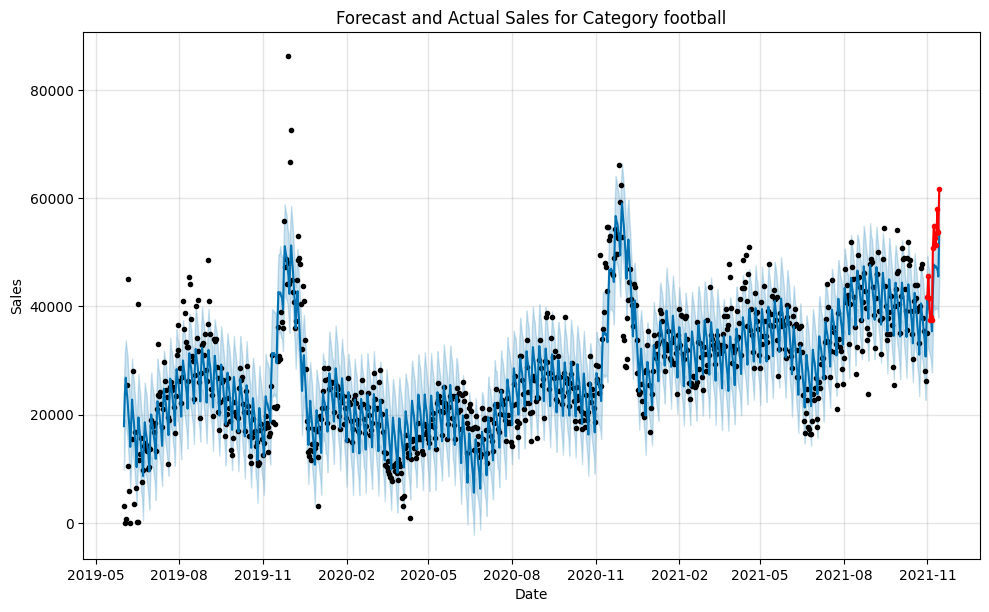

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6wqmfrez/xlev87a4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6wqmfrez/dxzo0mr_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47394', 'data', 'file=/tmp/tmp6wqmfrez/xlev87a4.json', 'init=/tmp/tmp6wqmfrez/dxzo0mr_.json', 'output', 'file=/tmp/tmp6wqmfrez/prophet_modellqolierm/prophet_model-20230422212812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:28:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:28:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Category: lifestyle
MAE: 1145.73
MSE: 1552834.18
RMSE: 1246.13


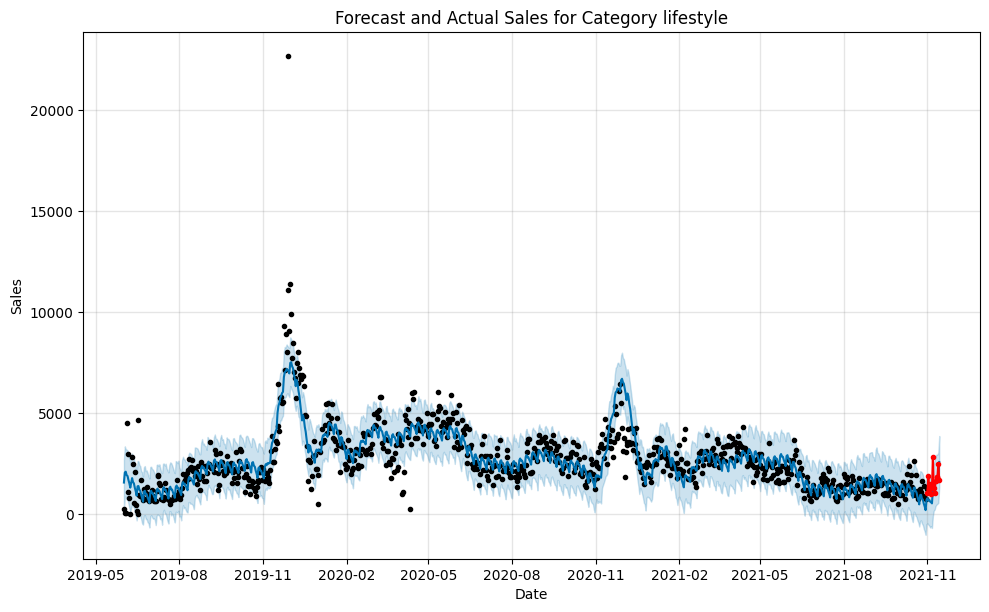

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6wqmfrez/g8mg0t76.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6wqmfrez/wqoqj7pv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86568', 'data', 'file=/tmp/tmp6wqmfrez/g8mg0t76.json', 'init=/tmp/tmp6wqmfrez/wqoqj7pv.json', 'output', 'file=/tmp/tmp6wqmfrez/prophet_modelo6uugwgm/prophet_model-20230422212813.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:28:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:28:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Category: running
MAE: 17615.25
MSE: 364931601.42
RMSE: 19103.18


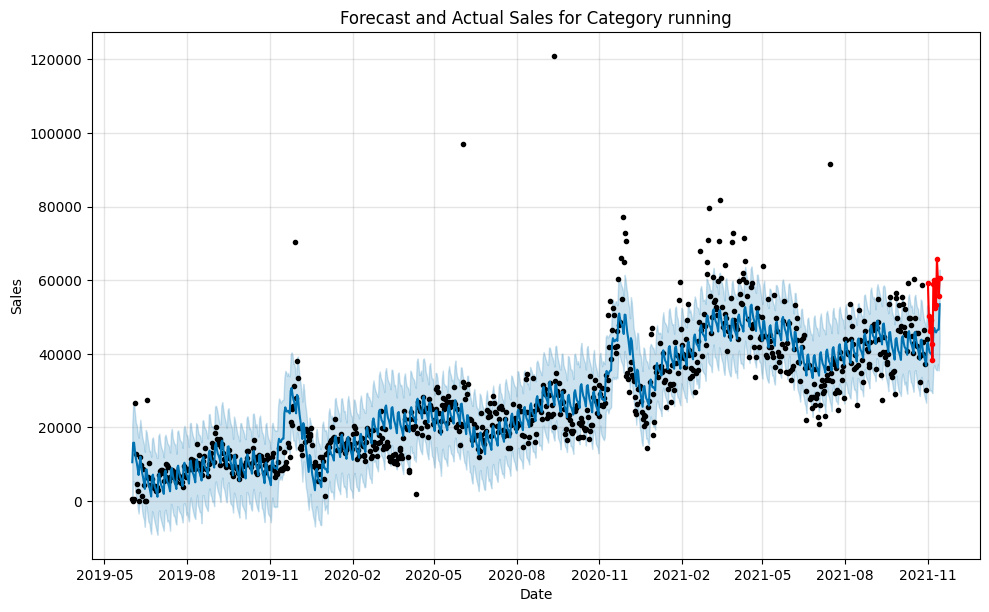

In [9]:
for category in train.columns:
    # Prepare the dataset for Prophet
    category_train = train[[category]].reset_index()
    category_train.columns = ['ds', 'y']
    
    # Fit the Prophet model and make a forecast
    model = Prophet()
    model.fit(category_train)
    future = model.make_future_dataframe(periods=14, freq='D')
    category_forecast = model.predict(future)

    # Evaluate the model on the test data
    test_forecast = category_forecast.loc[(category_forecast['ds'] >= '2021-01-01') & (category_forecast['ds'] <= '2021-01-14')]
    actual = test[[category]].reset_index().iloc[:len(test_forecast)]
    actual.columns = ['ds', 'y']
    
    mae = mean_absolute_error(actual['y'], test_forecast['yhat'])
    mse = mean_squared_error(actual['y'], test_forecast['yhat'])
    rmse = sqrt(mse)

    print(f"Category: {category}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}") 

        # Plot the forecast
    fig = model.plot(category_forecast)

     # Add actual sales to the plot
    plt.plot(actual['ds'], actual['y'], 'r.-', label='Actual sales')

    plt.title(f"Forecast and Actual Sales for Category {category}")
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()
